In [1]:
import pandas as pd

In [26]:
import matplotlib
matplotlib.rcParams.update({'font.size': 13})

In [3]:
all_data = pd.read_excel("all_dfs.xlsx")

In [4]:
all_data.columns

Index(['data_prop', 'sample_prop', 'sample_size', 'residual_type', 'test_type',
       'stat', 'CI stat (lower)', 'CI stat (upper)', 'pval', 'CI pval (lower)',
       'CI pval (upper)', 'Isnorm', 'CI (lower)', 'CI (upper)'],
      dtype='object')

In [5]:
data_s = [0, 10, 20, 30]
samples_s = [0, 10, 20, 30]

In [6]:
all_data.head()

,data_prop,sample_prop,sample_size,residual_type,test_type,stat,CI stat (lower),CI stat (upper),pval,CI pval (lower),CI pval (upper),Isnorm,CI (lower),CI (upper)
0,10,10,20,standardized,Kolmogorov_Smirnov,1.813642,1.626,2.001,0.539055,0.514,0.564,0.950,93.083,96.917
1,10,10,20,studentized,Kolmogorov_Smirnov,2.016718,1.803,2.231,0.520985,0.496,0.546,0.932,90.986,95.414
2,10,10,20,deleted_studentized,Kolmogorov_Smirnov,3.699785,3.228,4.171,0.432914,0.406,0.460,0.824,79.051,85.749
3,10,10,20,standardized,Shapiro_Wilk,0.953869,0.952,0.956,0.518305,0.492,0.544,0.958,94.036,97.564
4,10,10,20,studentized,Shapiro_Wilk,0.952754,0.950,0.955,0.511419,0.485,0.538,0.950,93.083,96.917


In [7]:
for d_s in data_s:
    for s_s in samples_s:
        curr_data = all_data[all_data['data_prop']==d_s]
        curr_data = curr_data[curr_data['sample_prop']==s_s]
        

In [8]:
data_use_1 = all_data[['data_prop', 'sample_prop', 'Isnorm', 'residual_type', 'test_type']]

In [9]:
map1 = {"standardized":"Stand", "studentized":"Stand", "deleted_studentized":"Deleted"}
data_use_1['Resid_type'] = data_use_1['residual_type'].map(map1)

/home/tory/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
data_use_1.head(10)

,data_prop,sample_prop,Isnorm,residual_type,test_type,Resid_type
0,10,10,0.950,standardized,Kolmogorov_Smirnov,Stand
1,10,10,0.932,studentized,Kolmogorov_Smirnov,Stand
2,10,10,0.824,deleted_studentized,Kolmogorov_Smirnov,Deleted
3,10,10,0.958,standardized,Shapiro_Wilk,Stand
4,10,10,0.950,studentized,Shapiro_Wilk,Stand
5,10,10,0.866,deleted_studentized,Shapiro_Wilk,Deleted
6,10,10,0.938,standardized,Kolmogorov_Smirnov,Stand
7,10,10,0.930,studentized,Kolmogorov_Smirnov,Stand
8,10,10,0.854,deleted_studentized,Kolmogorov_Smirnov,Deleted
9,10,10,0.948,standardized,Shapiro_Wilk,Stand


In [11]:
group1 = data_use_1.groupby(by = ['data_prop', 'sample_prop','Resid_type'], as_index = False).agg('mean')
group1

,data_prop,sample_prop,Resid_type,Isnorm
0,0,0,Deleted,0.9042
1,0,0,Stand,0.9422
2,0,10,Deleted,0.7648
3,0,10,Stand,0.8592
4,0,20,Deleted,0.8864
5,0,20,Stand,0.9340
6,0,30,Deleted,0.8864
7,0,30,Stand,0.9340
8,10,0,Deleted,0.7426
9,10,0,Stand,0.8369


In [12]:
group1_stand = group1[group1['Resid_type']=='Stand']
group1_not_stand = group1[group1['Resid_type']=='Deleted']

In [13]:
group1_not_stand

,data_prop,sample_prop,Resid_type,Isnorm
0,0,0,Deleted,0.9042
2,0,10,Deleted,0.7648
4,0,20,Deleted,0.8864
6,0,30,Deleted,0.8864
8,10,0,Deleted,0.7426
10,10,10,Deleted,0.8792
12,10,20,Deleted,0.8904
14,10,30,Deleted,0.8904
16,20,0,Deleted,0.8710
18,20,10,Deleted,0.8974


In [14]:
group1_not_stand.drop(['Resid_type'], axis = 1, inplace=True)

/home/tory/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
not_stand_matr = group1_not_stand.set_index(['data_prop', 'sample_prop']).sort_index().unstack(level = 'sample_prop')
# not_stand_matr

In [16]:
group1_stand.drop(['Resid_type'], axis = 1, inplace=True)

In [17]:
stand_matr = group1_stand.set_index(['data_prop', 'sample_prop']).sort_index().unstack(level = 'sample_prop')
stand_matr

Isnorm                        
sample_prop      0       10      20      30
data_prop                                  
0            0.9422  0.8592  0.9340  0.9340
10           0.8369  0.9355  0.9418  0.9418
20           0.9303  0.9410  0.9378  0.9378
30           0.9434  0.9410  0.9432  0.9432

In [19]:
from seaborn import heatmap

In [23]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Доля случаев, в которых распределения стьюдентизованных\nудаленных остатков соответствует нормальному')

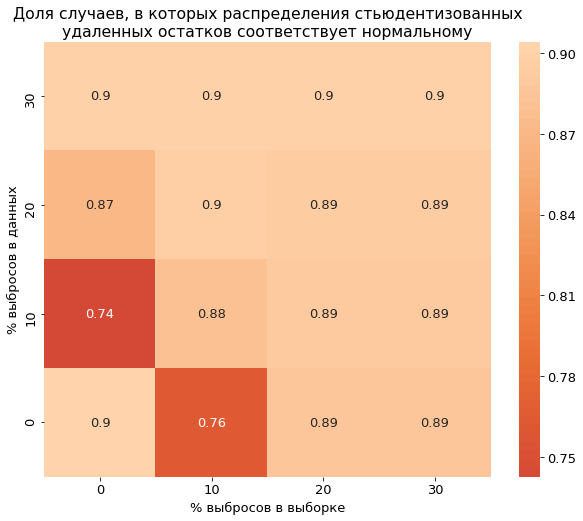

In [27]:
plt.figure(figsize=(10, 8))
heatmap(not_stand_matr.sort_index(ascending=False), center=0.5, annot=True, xticklabels=[0, 10, 20, 30])
plt.xlabel("% выбросов в выборке")
plt.ylabel("% выбросов в данных")
plt.title("Доля случаев, в которых распределения стьюдентизованных\nудаленных остатков соответствует нормальному")

Text(0.5, 1.0, 'Доля случаев, в которых распределения стандартизованных\n остатков соответствует нормальному')

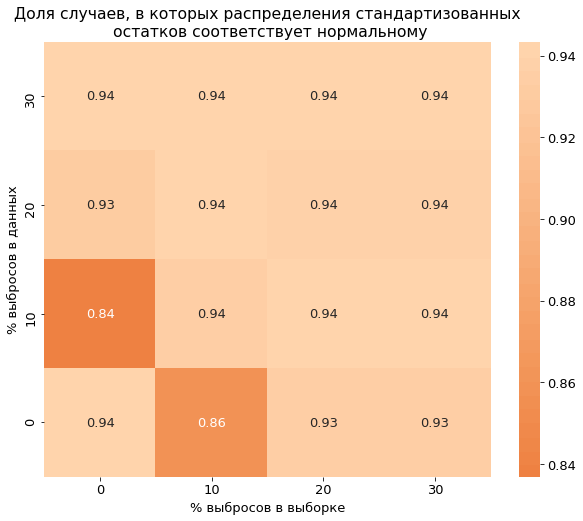

In [28]:
plt.figure(figsize=(10, 8))
heatmap(stand_matr.sort_index(ascending=False), center=0.5, annot=True, xticklabels=[0, 10, 20, 30])
plt.xlabel("% выбросов в выборке")
plt.ylabel("% выбросов в данных")
plt.title("Доля случаев, в которых распределения стандартизованных\n остатков соответствует нормальному")

# Plots

In [75]:
# import os

In [76]:
# path = os.getcwd()
# files = os.listdir(path)
# files

In [77]:
# files_zero = [f for f in files if (f[:4] == 'zero')&(not "test" in f) and (not "flat" in f)]
# files_zero

In [78]:
# df_zero = pd.DataFrame()

In [79]:
# for f in files_zero:
#     data = pd.read_excel(f, 'Sheet1')
#     df_zero = df_zero.append(data)

Get data

In [80]:
map2 = {"standardized":"Stand", "studentized":"Stand", "deleted_studentized":"Deleted"}
all_data['Resid_type'] = all_data['residual_type'].map(map2)
all_data_wrk = all_data[['data_prop', 'sample_prop', 'Isnorm', 'Resid_type', 'test_type', 'sample_size', 'CI (lower)', 'CI (upper)']]

In [81]:
zero_d = all_data_wrk[all_data_wrk['data_prop'] == 0]
ten_d = all_data_wrk[all_data_wrk['data_prop'] == 10]
twnt_d = all_data_wrk[all_data_wrk['data_prop'] == 20]
thrt_d = all_data_wrk[all_data_wrk['data_prop'] == 30]

In [82]:
zero_d

,data_prop,sample_prop,Isnorm,Resid_type,test_type,sample_size,CI (lower),CI (upper)
360,0,10,0.944,Stand,Kolmogorov_Smirnov,20,92.378,96.422
361,0,10,0.910,Stand,Kolmogorov_Smirnov,20,88.483,93.517
362,0,10,0.718,Deleted,Kolmogorov_Smirnov,20,67.842,75.758
363,0,10,0.950,Stand,Shapiro_Wilk,20,93.083,96.917
364,0,10,0.926,Stand,Shapiro_Wilk,20,90.298,94.902
...,...,...,...,...,...,...,...,...
475,0,0,0.922,Stand,Kolmogorov_Smirnov,1000,89.841,94.559
476,0,0,0.922,Deleted,Kolmogorov_Smirnov,1000,89.841,94.559
477,0,0,0.920,Stand,Shapiro_Wilk,1000,89.614,94.386
478,0,0,0.922,Stand,Shapiro_Wilk,1000,89.841,94.559


In [83]:
zero_d.drop(['data_prop'], axis = 1, inplace=True)
ten_d.drop(['data_prop'], axis = 1, inplace=True)
twnt_d.drop(['data_prop'], axis = 1, inplace=True)
thrt_d.drop(['data_prop'], axis = 1, inplace=True)

/home/tory/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [84]:
zero_d_gr = zero_d.groupby(by = ['sample_size', 'sample_prop', 'Resid_type'], as_index=False).agg('mean')
ten_d_gr = ten_d.groupby(by = ['sample_size', 'sample_prop', 'Resid_type'], as_index=False).agg('mean')
twnt_d_gr = twnt_d.groupby(by = ['sample_size', 'sample_prop', 'Resid_type'], as_index=False).agg('mean')
thrt_d_gr = thrt_d.groupby(by = ['sample_size', 'sample_prop', 'Resid_type'], as_index=False).agg('mean')

# Some setup

In [85]:
colors = ['#e37a1e', '#e0b95e']
names_plot = ['Удаленные станд. остатки', 'Стандратизованные остатки']
names_select = ['Deleted', 'Stand']

## Zero data

In [86]:
z1 = zero_d_gr[zero_d_gr['sample_prop'] == 0]
z2 = zero_d_gr[zero_d_gr['sample_prop'] == 10]
z3 = zero_d_gr[zero_d_gr['sample_prop'] == 20]
z4 = zero_d_gr[zero_d_gr['sample_prop'] == 30]

In [87]:
z1.drop(['sample_prop'], axis = 1, inplace = True)
z2.drop(['sample_prop'], axis = 1, inplace = True)
z3.drop(['sample_prop'], axis = 1, inplace = True)
z4.drop(['sample_prop'], axis = 1, inplace = True)

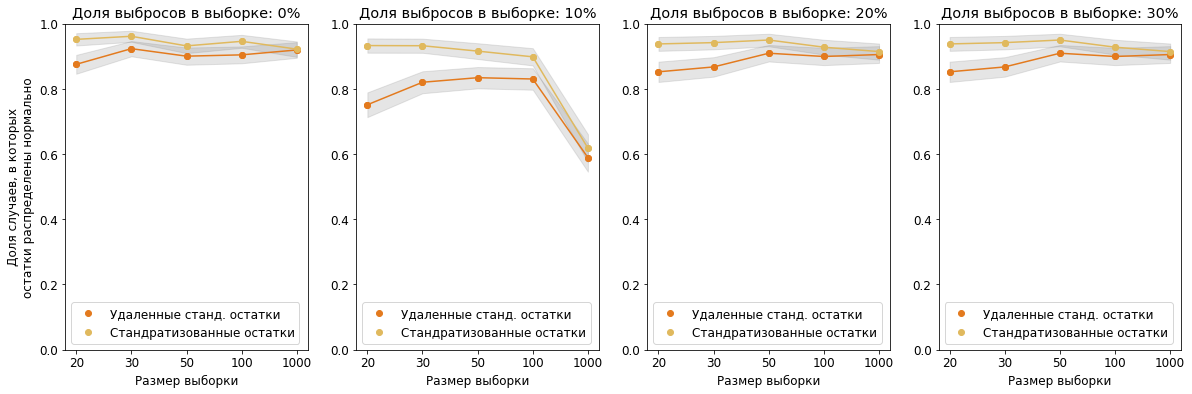

In [88]:
plt.figure(figsize=(20, 6))
matplotlib.rcParams.update({'font.size': 12})

plt.subplot(1, 4, 1)
for types, color1, color2 in [(names_select[0], colors[0], colors[0]), (names_select[1], colors[1], colors[1])]:
    data = z1[z1['Resid_type']==types]
    plt.plot(data['sample_size'].apply(str), data[['Isnorm']], 'bo', color = color1)
    
plt.legend(['Удаленные станд. остатки', 'Стандратизованные остатки'])

for types, color1, color2 in [(names_select[0], colors[0], colors[0]), (names_select[1], colors[1], colors[1])]:
    data = z1[z1['Resid_type']==types]
    plt.plot(data['sample_size'].apply(str), data[['Isnorm']], 'bo', color = color1)
    plt.plot(data['sample_size'].apply(str), data.Isnorm, color= color2)
    plt.fill_between(data['sample_size'].apply(str), data['CI (lower)']/100, data['CI (upper)']/100,
                 color='gray', alpha=0.2)
    
plt.gca().set(ylim=(0, 1),
              xlabel='Размер выборки', ylabel='Доля случаев, в которых\nостатки распределены нормально')

plt.title("Доля выбросов в выборке: 0%")

plt.subplot(1, 4, 2)
for types, color1, color2 in [(names_select[0], colors[0], colors[0]), (names_select[1], colors[1], colors[1])]:
    data = z2[z2['Resid_type']==types]
    plt.plot(data['sample_size'].apply(str), data[['Isnorm']], 'bo', color = color1)
    
plt.legend(['Удаленные станд. остатки', 'Стандратизованные остатки'])

for types, color1, color2 in [(names_select[0], colors[0], colors[0]), (names_select[1], colors[1], colors[1])]:
    data = z2[z2['Resid_type']==types]
    plt.plot(data['sample_size'].apply(str), data[['Isnorm']], 'bo', color = color1)
    plt.plot(data['sample_size'].apply(str), data.Isnorm, color= color2)
    plt.fill_between(data['sample_size'].apply(str), data['CI (lower)']/100, data['CI (upper)']/100,
                 color='gray', alpha=0.2)
    
plt.gca().set(ylim=(0, 1),
              xlabel='Размер выборки')

plt.title("Доля выбросов в выборке: 10%")

plt.subplot(1, 4, 3)
for types, color1, color2 in [(names_select[0], colors[0], colors[0]), (names_select[1], colors[1], colors[1])]:
    data = z3[z3['Resid_type']==types]
    plt.plot(data['sample_size'].apply(str), data[['Isnorm']], 'bo', color = color1)
    
plt.legend(['Удаленные станд. остатки', 'Стандратизованные остатки'])

for types, color1, color2 in [(names_select[0], colors[0], colors[0]), (names_select[1], colors[1], colors[1])]:
    data = z3[z3['Resid_type']==types]
    plt.plot(data['sample_size'].apply(str), data[['Isnorm']], 'bo', color = color1)
    plt.plot(data['sample_size'].apply(str), data.Isnorm, color= color2)
    plt.fill_between(data['sample_size'].apply(str), data['CI (lower)']/100, data['CI (upper)']/100,
                 color='gray', alpha=0.2)
    
plt.gca().set(ylim=(0, 1),
              xlabel='Размер выборки')

plt.title("Доля выбросов в выборке: 20%")

plt.subplot(1, 4, 4)
for types, color1, color2 in [(names_select[0], colors[0], colors[0]), (names_select[1], colors[1], colors[1])]:
    data = z4[z4['Resid_type']==types]
    plt.plot(data['sample_size'].apply(str), data[['Isnorm']], 'bo', color = color1)
    
plt.legend(['Удаленные станд. остатки', 'Стандратизованные остатки'])

for types, color1, color2 in [(names_select[0], colors[0], colors[0]), (names_select[1], colors[1], colors[1])]:
    data = z4[z4['Resid_type']==types]
    plt.plot(data['sample_size'].apply(str), data[['Isnorm']], 'bo', color = color1)
    plt.plot(data['sample_size'].apply(str), data.Isnorm, color= color2)
    plt.fill_between(data['sample_size'].apply(str), data['CI (lower)']/100, data['CI (upper)']/100,
                 color='gray', alpha=0.2)
    
plt.gca().set(ylim=(0, 1),
              xlabel='Размер выборки')

plt.title("Доля выбросов в выборке: 30%")


plt.show()

## Ten data

In [89]:
z1 = ten_d_gr[ten_d_gr['sample_prop'] == 0]
z2 = ten_d_gr[ten_d_gr['sample_prop'] == 10]
z3 = ten_d_gr[ten_d_gr['sample_prop'] == 20]
z4 = ten_d_gr[ten_d_gr['sample_prop'] == 30]

In [90]:
z1.drop(['sample_prop'], axis = 1, inplace = True)
z2.drop(['sample_prop'], axis = 1, inplace = True)
z3.drop(['sample_prop'], axis = 1, inplace = True)
z4.drop(['sample_prop'], axis = 1, inplace = True)

/home/tory/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


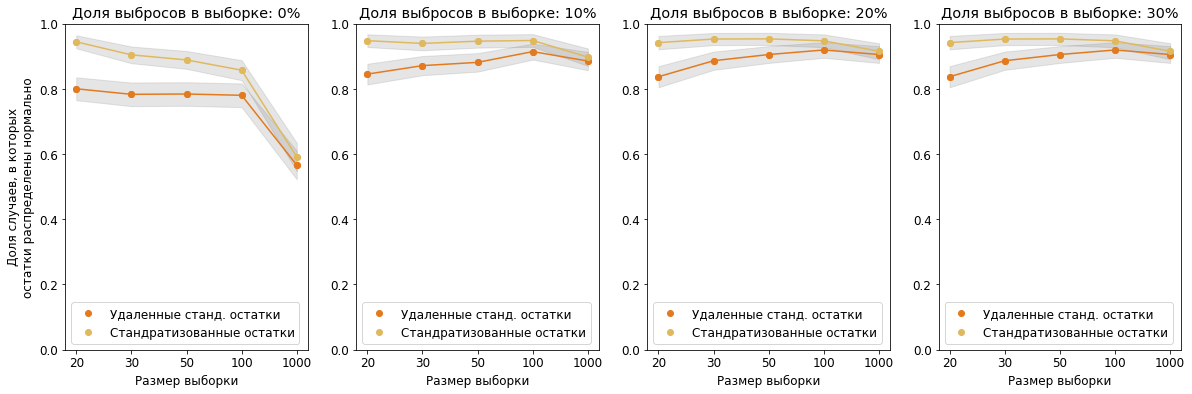

In [91]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 4, 1)
for types, color1, color2 in [(names_select[0], colors[0], colors[0]), (names_select[1], colors[1], colors[1])]:
    data = z1[z1['Resid_type']==types]
    plt.plot(data['sample_size'].apply(str), data[['Isnorm']], 'bo', color = color1)
    
plt.legend(['Удаленные станд. остатки', 'Стандратизованные остатки'])

for types, color1, color2 in [(names_select[0], colors[0], colors[0]), (names_select[1], colors[1], colors[1])]:
    data = z1[z1['Resid_type']==types]
    plt.plot(data['sample_size'].apply(str), data[['Isnorm']], 'bo', color = color1)
    plt.plot(data['sample_size'].apply(str), data.Isnorm, color= color2)
    plt.fill_between(data['sample_size'].apply(str), data['CI (lower)']/100, data['CI (upper)']/100,
                 color='gray', alpha=0.2)
    
plt.gca().set(ylim=(0, 1),
              xlabel='Размер выборки', ylabel='Доля случаев, в которых\nостатки распределены нормально')

plt.title("Доля выбросов в выборке: 0%")

plt.subplot(1, 4, 2)
for types, color1, color2 in [(names_select[0], colors[0], colors[0]), (names_select[1], colors[1], colors[1])]:
    data = z2[z2['Resid_type']==types]
    plt.plot(data['sample_size'].apply(str), data[['Isnorm']], 'bo', color = color1)
    
plt.legend(['Удаленные станд. остатки', 'Стандратизованные остатки'])

for types, color1, color2 in [(names_select[0], colors[0], colors[0]), (names_select[1], colors[1], colors[1])]:
    data = z2[z2['Resid_type']==types]
    plt.plot(data['sample_size'].apply(str), data[['Isnorm']], 'bo', color = color1)
    plt.plot(data['sample_size'].apply(str), data.Isnorm, color= color2)
    plt.fill_between(data['sample_size'].apply(str), data['CI (lower)']/100, data['CI (upper)']/100,
                 color='gray', alpha=0.2)
    
plt.gca().set(ylim=(0, 1),
              xlabel='Размер выборки')

plt.title("Доля выбросов в выборке: 10%")

plt.subplot(1, 4, 3)
for types, color1, color2 in [(names_select[0], colors[0], colors[0]), (names_select[1], colors[1], colors[1])]:
    data = z3[z3['Resid_type']==types]
    plt.plot(data['sample_size'].apply(str), data[['Isnorm']], 'bo', color = color1)
    
plt.legend(['Удаленные станд. остатки', 'Стандратизованные остатки'])

for types, color1, color2 in [(names_select[0], colors[0], colors[0]), (names_select[1], colors[1], colors[1])]:
    data = z3[z3['Resid_type']==types]
    plt.plot(data['sample_size'].apply(str), data[['Isnorm']], 'bo', color = color1)
    plt.plot(data['sample_size'].apply(str), data.Isnorm, color= color2)
    plt.fill_between(data['sample_size'].apply(str), data['CI (lower)']/100, data['CI (upper)']/100,
                 color='gray', alpha=0.2)
    
plt.gca().set(ylim=(0, 1),
              xlabel='Размер выборки')

plt.title("Доля выбросов в выборке: 20%")

plt.subplot(1, 4, 4)
for types, color1, color2 in [(names_select[0], colors[0], colors[0]), (names_select[1], colors[1], colors[1])]:
    data = z4[z4['Resid_type']==types]
    plt.plot(data['sample_size'].apply(str), data[['Isnorm']], 'bo', color = color1)
    
plt.legend(['Удаленные станд. остатки', 'Стандратизованные остатки'])

for types, color1, color2 in [(names_select[0], colors[0], colors[0]), (names_select[1], colors[1], colors[1])]:
    data = z4[z4['Resid_type']==types]
    plt.plot(data['sample_size'].apply(str), data[['Isnorm']], 'bo', color = color1)
    plt.plot(data['sample_size'].apply(str), data.Isnorm, color= color2)
    plt.fill_between(data['sample_size'].apply(str), data['CI (lower)']/100, data['CI (upper)']/100,
                 color='gray', alpha=0.2)
    
plt.gca().set(ylim=(0, 1),
              xlabel='Размер выборки')

plt.title("Доля выбросов в выборке: 30%")


plt.show()

[(0.5, 1),
 Text(0, 0.5, 'Доля случаев, в которых\nостатки распределены нормально'),
 Text(0.5, 0, 'Размер выборки')]

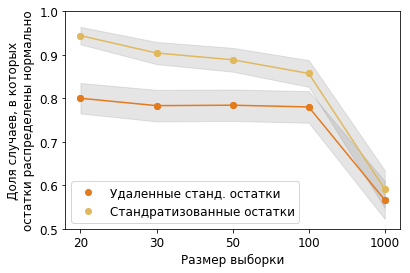

In [92]:
for types, color1, color2 in [('Deleted', '#e37a1e', '#e37a1e'), ('Stand', '#e0b95e', '#e0b95e')]:
    data = z1[z1['Resid_type']==types]
    plt.plot(data['sample_size'].apply(str), data[['Isnorm']], 'bo', color = color1)
    
plt.legend(['Удаленные станд. остатки', 'Стандратизованные остатки'])

for types, color1, color2 in [('Deleted', '#e37a1e', '#e37a1e'), ('Stand', '#e0b95e', '#e0b95e')]:
    data = z1[z1['Resid_type']==types]
    plt.plot(data['sample_size'].apply(str), data[['Isnorm']], 'bo', color = color1)
    plt.plot(data['sample_size'].apply(str), data.Isnorm, color= color2)
    plt.fill_between(data['sample_size'].apply(str), data['CI (lower)']/100, data['CI (upper)']/100,
                 color='gray', alpha=0.2)
    
plt.gca().set(ylim=(0.5, 1),
              xlabel='Размер выборки', ylabel='Доля случаев, в которых\nостатки распределены нормально')

## Twenty data

In [93]:
z1 = twnt_d_gr[twnt_d_gr['sample_prop'] == 0]
z2 = twnt_d_gr[twnt_d_gr['sample_prop'] == 10]
z3 = twnt_d_gr[twnt_d_gr['sample_prop'] == 20]
z4 = twnt_d_gr[twnt_d_gr['sample_prop'] == 30]

In [94]:
z1.drop(['sample_prop'], axis = 1, inplace = True)
z2.drop(['sample_prop'], axis = 1, inplace = True)
z3.drop(['sample_prop'], axis = 1, inplace = True)
z4.drop(['sample_prop'], axis = 1, inplace = True)

/home/tory/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


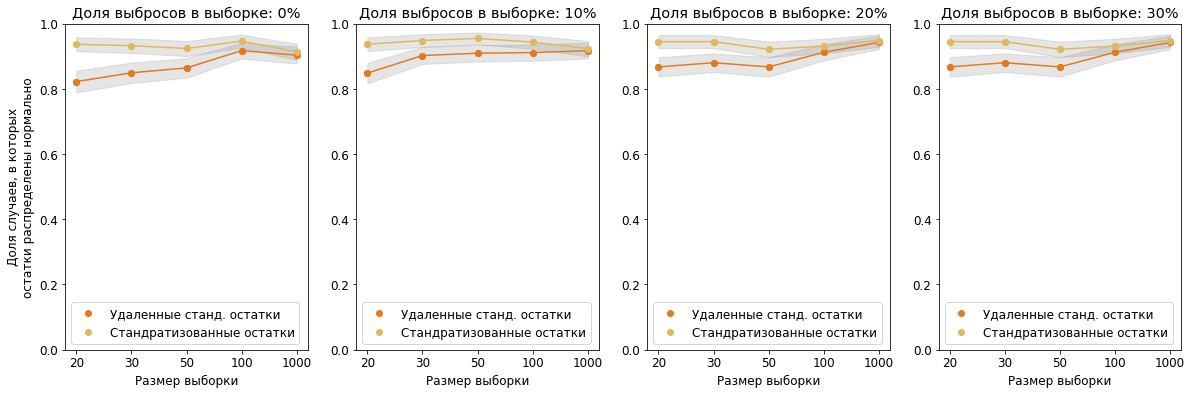

In [95]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 4, 1)
for types, color1, color2 in [(names_select[0], colors[0], colors[0]), (names_select[1], colors[1], colors[1])]:
    data = z1[z1['Resid_type']==types]
    plt.plot(data['sample_size'].apply(str), data[['Isnorm']], 'bo', color = color1)
    
plt.legend(['Удаленные станд. остатки', 'Стандратизованные остатки'])

for types, color1, color2 in [(names_select[0], colors[0], colors[0]), (names_select[1], colors[1], colors[1])]:
    data = z1[z1['Resid_type']==types]
    plt.plot(data['sample_size'].apply(str), data[['Isnorm']], 'bo', color = color1)
    plt.plot(data['sample_size'].apply(str), data.Isnorm, color= color2)
    plt.fill_between(data['sample_size'].apply(str), data['CI (lower)']/100, data['CI (upper)']/100,
                 color='gray', alpha=0.2)
    
plt.gca().set(ylim=(0, 1),
              xlabel='Размер выборки', ylabel='Доля случаев, в которых\nостатки распределены нормально')

plt.title("Доля выбросов в выборке: 0%")

plt.subplot(1, 4, 2)
for types, color1, color2 in [(names_select[0], colors[0], colors[0]), (names_select[1], colors[1], colors[1])]:
    data = z2[z2['Resid_type']==types]
    plt.plot(data['sample_size'].apply(str), data[['Isnorm']], 'bo', color = color1)
    
plt.legend(['Удаленные станд. остатки', 'Стандратизованные остатки'])

for types, color1, color2 in [(names_select[0], colors[0], colors[0]), (names_select[1], colors[1], colors[1])]:
    data = z2[z2['Resid_type']==types]
    plt.plot(data['sample_size'].apply(str), data[['Isnorm']], 'bo', color = color1)
    plt.plot(data['sample_size'].apply(str), data.Isnorm, color= color2)
    plt.fill_between(data['sample_size'].apply(str), data['CI (lower)']/100, data['CI (upper)']/100,
                 color='gray', alpha=0.2)
    
plt.gca().set(ylim=(0, 1),
              xlabel='Размер выборки')

plt.title("Доля выбросов в выборке: 10%")

plt.subplot(1, 4, 3)
for types, color1, color2 in [(names_select[0], colors[0], colors[0]), (names_select[1], colors[1], colors[1])]:
    data = z3[z3['Resid_type']==types]
    plt.plot(data['sample_size'].apply(str), data[['Isnorm']], 'bo', color = color1)
    
plt.legend(['Удаленные станд. остатки', 'Стандратизованные остатки'])

for types, color1, color2 in [(names_select[0], colors[0], colors[0]), (names_select[1], colors[1], colors[1])]:
    data = z3[z3['Resid_type']==types]
    plt.plot(data['sample_size'].apply(str), data[['Isnorm']], 'bo', color = color1)
    plt.plot(data['sample_size'].apply(str), data.Isnorm, color= color2)
    plt.fill_between(data['sample_size'].apply(str), data['CI (lower)']/100, data['CI (upper)']/100,
                 color='gray', alpha=0.2)
    
plt.gca().set(ylim=(0, 1),
              xlabel='Размер выборки')

plt.title("Доля выбросов в выборке: 20%")

plt.subplot(1, 4, 4)
for types, color1, color2 in [(names_select[0], colors[0], colors[0]), (names_select[1], colors[1], colors[1])]:
    data = z4[z4['Resid_type']==types]
    plt.plot(data['sample_size'].apply(str), data[['Isnorm']], 'bo', color = color1)
    
plt.legend(['Удаленные станд. остатки', 'Стандратизованные остатки'])

for types, color1, color2 in [(names_select[0], colors[0], colors[0]), (names_select[1], colors[1], colors[1])]:
    data = z4[z4['Resid_type']==types]
    plt.plot(data['sample_size'].apply(str), data[['Isnorm']], 'bo', color = color1)
    plt.plot(data['sample_size'].apply(str), data.Isnorm, color= color2)
    plt.fill_between(data['sample_size'].apply(str), data['CI (lower)']/100, data['CI (upper)']/100,
                 color='gray', alpha=0.2)
    
plt.gca().set(ylim=(0, 1),
              xlabel='Размер выборки')

plt.title("Доля выбросов в выборке: 30%")


plt.show()

## Thirty data

In [96]:
z1 = thrt_d_gr[thrt_d_gr['sample_prop'] == 0]
z2 = thrt_d_gr[thrt_d_gr['sample_prop'] == 10]
z3 = thrt_d_gr[thrt_d_gr['sample_prop'] == 20]
z4 = thrt_d_gr[thrt_d_gr['sample_prop'] == 30]

In [97]:
z1.drop(['sample_prop'], axis = 1, inplace = True)
z2.drop(['sample_prop'], axis = 1, inplace = True)
z3.drop(['sample_prop'], axis = 1, inplace = True)
z4.drop(['sample_prop'], axis = 1, inplace = True)

/home/tory/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


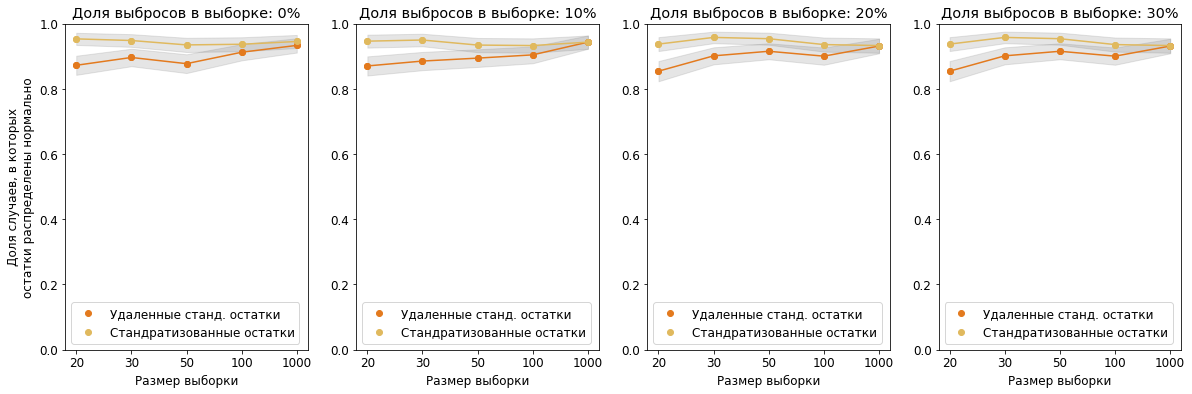

In [98]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 4, 1)
for types, color1, color2 in [(names_select[0], colors[0], colors[0]), (names_select[1], colors[1], colors[1])]:
    data = z1[z1['Resid_type']==types]
    plt.plot(data['sample_size'].apply(str), data[['Isnorm']], 'bo', color = color1)
    
plt.legend(['Удаленные станд. остатки', 'Стандратизованные остатки'])

for types, color1, color2 in [(names_select[0], colors[0], colors[0]), (names_select[1], colors[1], colors[1])]:
    data = z1[z1['Resid_type']==types]
    plt.plot(data['sample_size'].apply(str), data[['Isnorm']], 'bo', color = color1)
    plt.plot(data['sample_size'].apply(str), data.Isnorm, color= color2)
    plt.fill_between(data['sample_size'].apply(str), data['CI (lower)']/100, data['CI (upper)']/100,
                 color='gray', alpha=0.2)
    
plt.gca().set(ylim=(0, 1),
              xlabel='Размер выборки', ylabel='Доля случаев, в которых\nостатки распределены нормально')

plt.title("Доля выбросов в выборке: 0%")

plt.subplot(1, 4, 2)
for types, color1, color2 in [(names_select[0], colors[0], colors[0]), (names_select[1], colors[1], colors[1])]:
    data = z2[z2['Resid_type']==types]
    plt.plot(data['sample_size'].apply(str), data[['Isnorm']], 'bo', color = color1)
    
plt.legend(['Удаленные станд. остатки', 'Стандратизованные остатки'])

for types, color1, color2 in [(names_select[0], colors[0], colors[0]), (names_select[1], colors[1], colors[1])]:
    data = z2[z2['Resid_type']==types]
    plt.plot(data['sample_size'].apply(str), data[['Isnorm']], 'bo', color = color1)
    plt.plot(data['sample_size'].apply(str), data.Isnorm, color= color2)
    plt.fill_between(data['sample_size'].apply(str), data['CI (lower)']/100, data['CI (upper)']/100,
                 color='gray', alpha=0.2)
    
plt.gca().set(ylim=(0, 1),
              xlabel='Размер выборки')

plt.title("Доля выбросов в выборке: 10%")

plt.subplot(1, 4, 3)
for types, color1, color2 in [(names_select[0], colors[0], colors[0]), (names_select[1], colors[1], colors[1])]:
    data = z3[z3['Resid_type']==types]
    plt.plot(data['sample_size'].apply(str), data[['Isnorm']], 'bo', color = color1)
    
plt.legend(['Удаленные станд. остатки', 'Стандратизованные остатки'])

for types, color1, color2 in [(names_select[0], colors[0], colors[0]), (names_select[1], colors[1], colors[1])]:
    data = z3[z3['Resid_type']==types]
    plt.plot(data['sample_size'].apply(str), data[['Isnorm']], 'bo', color = color1)
    plt.plot(data['sample_size'].apply(str), data.Isnorm, color= color2)
    plt.fill_between(data['sample_size'].apply(str), data['CI (lower)']/100, data['CI (upper)']/100,
                 color='gray', alpha=0.2)
    
plt.gca().set(ylim=(0, 1),
              xlabel='Размер выборки')

plt.title("Доля выбросов в выборке: 20%")

plt.subplot(1, 4, 4)
for types, color1, color2 in [(names_select[0], colors[0], colors[0]), (names_select[1], colors[1], colors[1])]:
    data = z4[z4['Resid_type']==types]
    plt.plot(data['sample_size'].apply(str), data[['Isnorm']], 'bo', color = color1)
    
plt.legend(['Удаленные станд. остатки', 'Стандратизованные остатки'])

for types, color1, color2 in [(names_select[0], colors[0], colors[0]), (names_select[1], colors[1], colors[1])]:
    data = z4[z4['Resid_type']==types]
    plt.plot(data['sample_size'].apply(str), data[['Isnorm']], 'bo', color = color1)
    plt.plot(data['sample_size'].apply(str), data.Isnorm, color= color2)
    plt.fill_between(data['sample_size'].apply(str), data['CI (lower)']/100, data['CI (upper)']/100,
                 color='gray', alpha=0.2)
    
plt.gca().set(ylim=(0, 1),
              xlabel='Размер выборки')

plt.title("Доля выбросов в выборке: 30%")


plt.show()